## Image Search

### Objetivo
Automatizar a pesquisa por imagem pela internet e explorar outras utilidades

In [1]:
import requests
import cv2
import re
import io
import base64
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
#from requests_toolbelt.multipart.encoder import MultipartEncoder

In [3]:
url = 'https://www.google.com/searchbyimage/upload'
file_name = 'copied_photo.jpg'

r = requests.post(
    url, 
    #data = mp_encoder, 
    files = {'encoded_image': (file_name, open(file_name, 'rb'), 'image/jpeg')},
    headers={
        'accept-language': 'pt-BR',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.138 Safari/537.36'
    }
)

assert r.status_code == 200, 'deu ruim'


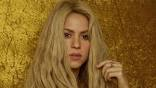
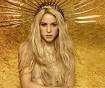
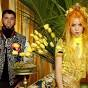
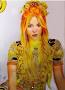
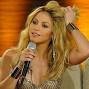
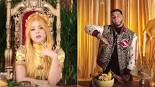
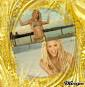
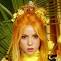
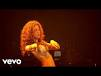
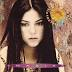
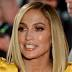
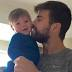
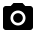
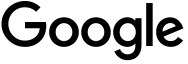

In [4]:
from IPython.core.display import display, HTML
display(HTML(r.text))

In [7]:


regex = r"{var s='data:image/(.+?);base64,(.+?)';var ii="
matches = re.findall(regex, r.text)

results = []
for i, match in enumerate(matches):
    ext, data64 = match
    databin = None
    try:
        databin = base64.b64decode(data64)
        pil_img = Image.open(io.BytesIO(databin))
    except: continue
    cv_img = np.array(pil_img)
    
    results.append(np.flip(cv_img, axis=1) )

len(results)

27

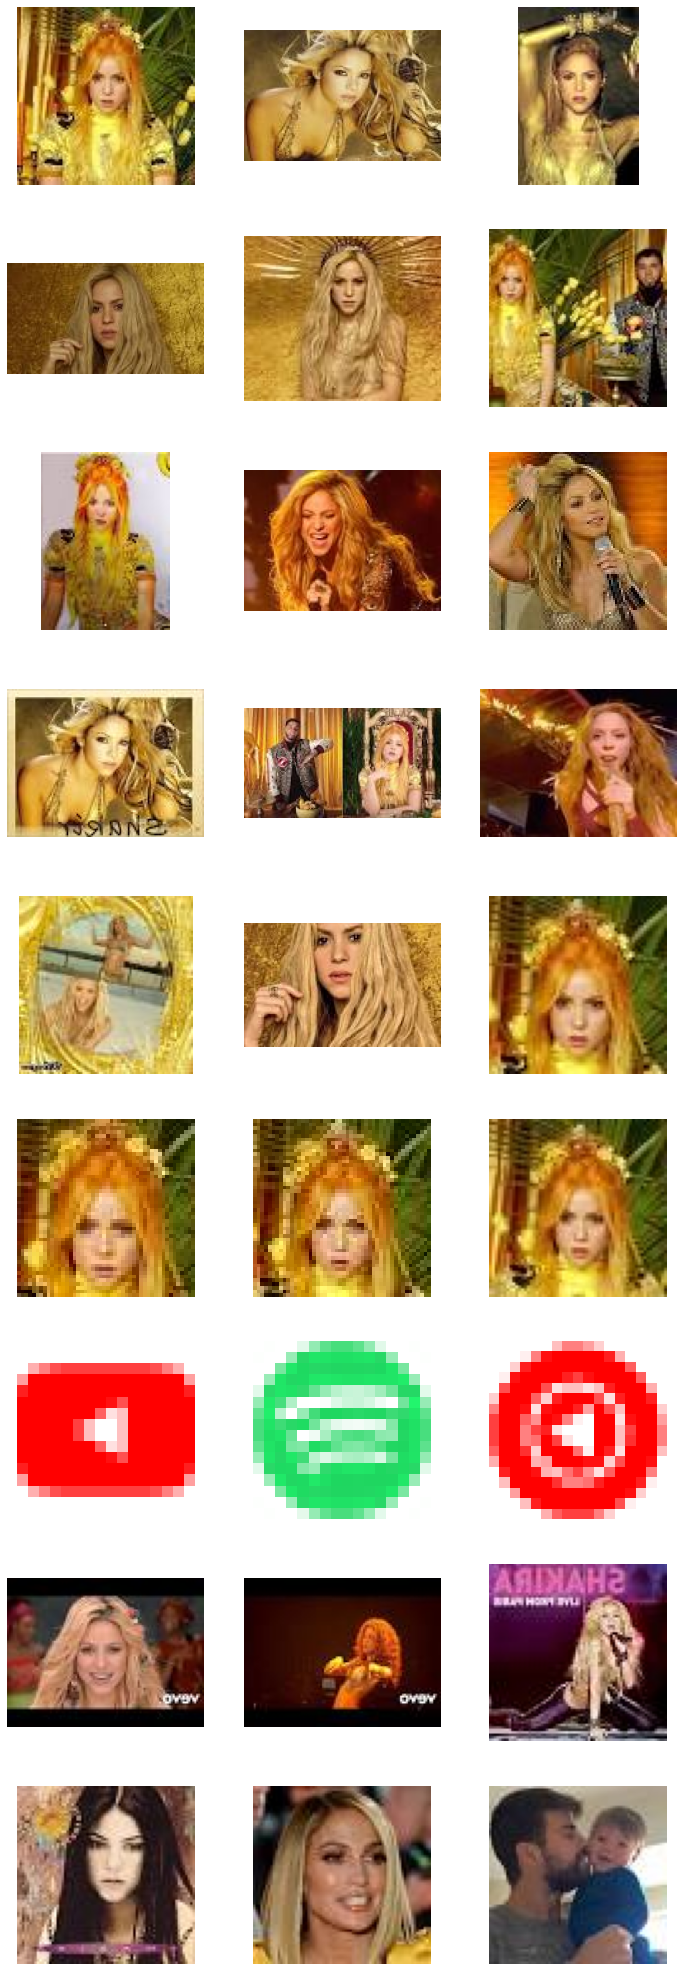

In [8]:

nm_comb = len(results)
fig_x, nm_cols = 12, 3
fig, axs = plt.subplots(
    np.ceil(nm_comb / nm_cols).astype(int), nm_cols, 
    figsize=(fig_x, np.ceil(fig_x * nm_comb // (nm_cols ** 2)).astype(int) )
)
fig.subplots_adjust(hspace = .25)

for i, img in enumerate(results):
    ax = axs[i // nm_cols, i % nm_cols]
    ax.imshow(img)
    ax.axis('off')

plt.show()

Não foi difícil acessar e interpretar as imagens em base64.

Abaixo estarei explorando a possibilidade de fazer a Pesquisa com sub-imagens.

(-0.5, 949.5, 632.5, -0.5)

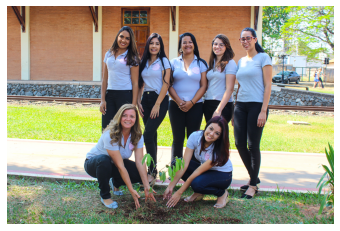

In [7]:
study_img = cv2.cvtColor(cv2.imread('study_case_all.png'), cv2.COLOR_BGR2RGB)
plt.imshow(study_img)
plt.axis('off')

(-0.5, 89.5, 124.5, -0.5)

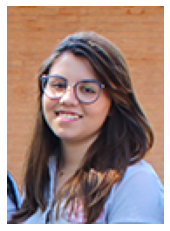

In [8]:
study_part_img = cv2.cvtColor(cv2.imread('study_case.png'), cv2.COLOR_BGR2RGB)
plt.imshow(study_part_img)
plt.axis('off')

Text(0.5, 1.0, 'Residual do Template Matching com Erro Quadrado Normalizado')

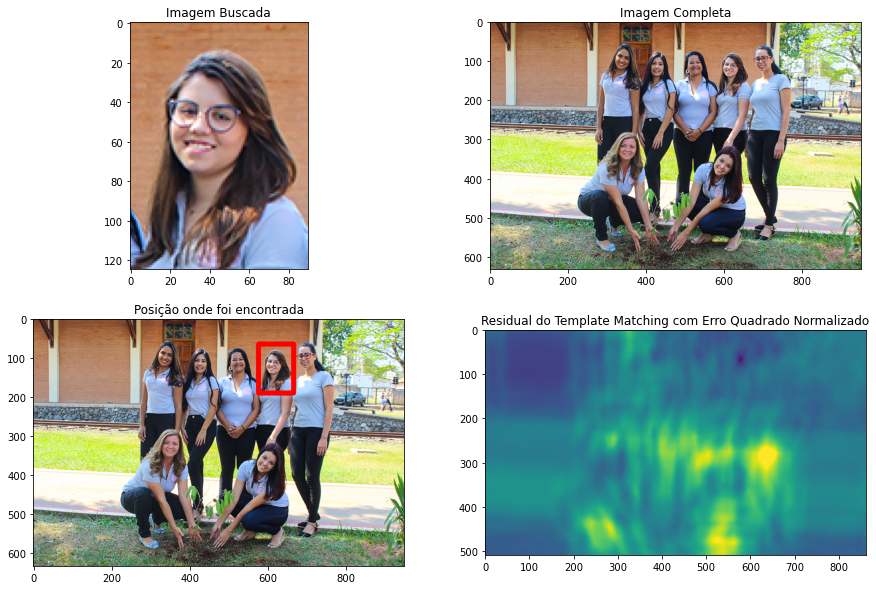

In [9]:

res = cv2.matchTemplate(study_img, study_part_img, cv2.TM_SQDIFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
top_left = min_loc
h, w = study_part_img.shape[:2]
bottom_right = (top_left[0] + w, top_left[1] + h)

plt.figure(figsize=(15, 10))

ax = plt.subplot(221)
ax.imshow(study_part_img)
ax.set_title('Imagem Buscada')

ax = plt.subplot(222)
ax.imshow(study_img)
ax.set_title('Imagem Completa')

cv2.rectangle(study_img, top_left, bottom_right, 255, 12)
ax = plt.subplot(223)
ax.imshow(study_img)
ax.set_title('Posição onde foi encontrada')

ax = plt.subplot(224)
ax.imshow(res)
ax.set_title('Residual do Template Matching com Erro Quadrado Normalizado')

Acima temos um exemplo de como uma sub-imagem poderia ter sido encontrada.


Para validar se o google encontrou de fato a imagem, basta validar com a regex abaixo.

In [10]:
import re

with open('result.html') as fl:
    html = fl.read()

resp = re.search(r'>Encontrar esta imagem em outros tamanhos:<', html)
resp != None

True